Merged.

Number of subjects: 6, only one wave file is available.

File format: merged original and reconstructed waveform.

7 trials.


In [1]:
from dSPEECH.config import *
import matplotlib.pyplot as plt

pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [11]:
import librosa
trial_num=7
folder=data_dir+'evaluation_matrix/dataset5/'
filename=folder+'merged.MP3'
audio,sf=librosa.load(filename) # (617400,) sf=22050
trial_len=int(audio.shape[0]/trial_num)

In [3]:
starts_target=[i*trial_len for i in range(trial_num)]
starts_pred=[i+int(trial_len/2) for i in starts_target]

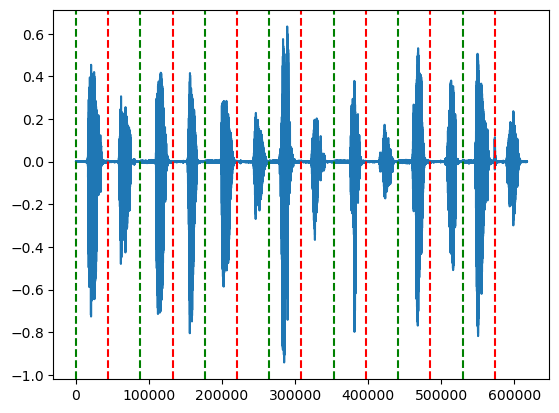

In [8]:
fig,ax=plt.subplots()
ax.plot(audio)
for i in range(len(starts_pred)):
    ax.axvline(x=int(starts_target[i]), color='green', linestyle='--')
    ax.axvline(x=int(starts_pred[i]), color='red', linestyle='--')

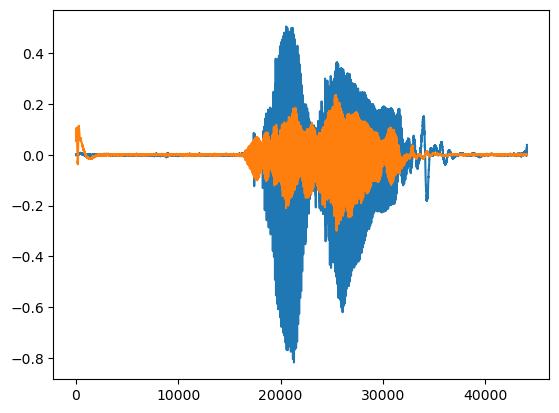

In [10]:
# check: looks good
plt.plot(audio[starts_target[-1]:starts_target[-1]+int(trial_len/2)])
plt.plot(audio[starts_pred[-1]:starts_pred[-1]+int(trial_len/2)])

In [12]:
import soundfile
for trial in range(trial_num):
    if trial==trial_num-1: # same as the else clause
        tmp1=audio[starts_target[trial]:starts_target[trial]+int(trial_len/2)]
        soundfile.write(folder+'target_trial_'+str(trial)+'.wav', tmp1, sf)
        
        tmp2=audio[starts_pred[trial]:starts_pred[trial]+int(trial_len/2)]
        soundfile.write(folder+'pred_trial_'+str(trial)+'.wav', tmp2, sf)
        
    else:
        tmp1=audio[starts_target[trial]:starts_target[trial]+int(trial_len/2)]
        soundfile.write(folder+'target_trial_'+str(trial)+'.wav', tmp1, sf)
        
        tmp2=audio[starts_pred[trial]:starts_pred[trial]+int(trial_len/2)]
        soundfile.write(folder+'pred_trial_'+str(trial)+'.wav', tmp2, sf)

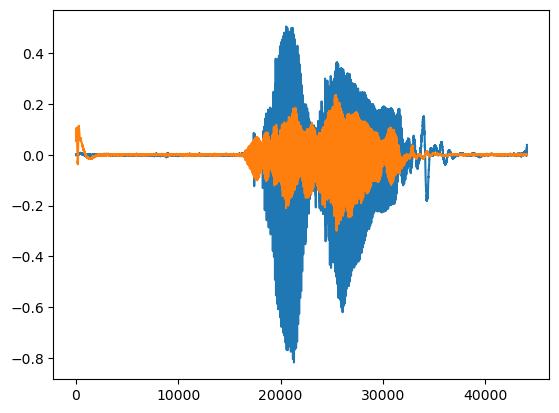

In [13]:
plt.plot(tmp1)
plt.plot(tmp2)